In [53]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [54]:
data = pd.read_csv('Dataset/Mult_Reg_Yield.csv')
data.head()

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7


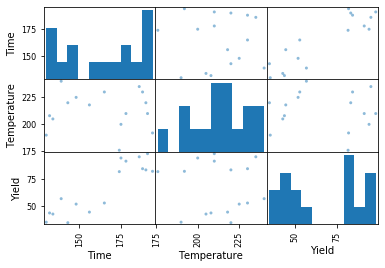

In [55]:
scatter_matrix(data)
plt.show()

In [56]:
time = data.Time
temp = data.Temperature
output = data.Yield

In [57]:
model = ols('output ~ time + temp',data).fit()
model.summary()

C:\Users\apraj\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           2.32e-05
Time:                        20:32:14   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
temp          -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
anova_table = anova_lm(model)

In [59]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
time,1.0,6777.810462,6777.810462,53.987220,0.000006
temp,1.0,19.252534,19.252534,0.153352,0.701696
Residual,13.0,1632.081378,125.544721,NaN,NaN


In [60]:
model = ols('output ~ time',data).fit()
model.summary()

C:\Users\apraj\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     57.46
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           2.55e-06
Time:                        20:32:16   Log-Likelihood:                -59.797
No. Observations:                  16   AIC:                             123.6
Df Residuals:                      14   BIC:                             125.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6205     19.791     -4.124      0.001    -124.067     -39.174
time           0.9065      0.120      7.580      0.000       0.650       1.163
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.969
Skew:                          -0.127   Prob(JB):                        0.616
Kurtosis:                       1.822   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
pred = model.predict()
type(pred.round(3))

numpy.ndarray

In [62]:
pred = pd.Series(pred)

In [63]:
result = [output,pred,res]

In [64]:
result

[0     35.0
 1     81.7
 2     42.5
 3     98.3
 4     52.7
 5     82.0
 6     34.5
 7     95.4
 8     56.7
 9     84.4
 10    94.3
 11    44.3
 12    83.3
 13    91.4
 14    43.5
 15    51.7
 Name: Yield, dtype: float64, 0     36.218472
 1     76.102442
 2     39.844288
 3     91.512158
 4     67.944357
 5     94.231519
 6     48.002372
 7     86.979888
 8     44.376557
 9     88.792796
 10    77.008896
 11    59.786272
 12    90.605704
 13    79.728257
 14    38.031380
 15    52.534642
 dtype: float64, 0     -1.218
 1      5.598
 2      2.656
 3      6.788
 4    -15.244
 5    -12.232
 6    -13.502
 7      8.420
 8     12.323
 9     -4.393
 10    17.291
 11   -15.486
 12    -7.306
 13    11.672
 14     5.469
 15    -0.835
 Name: Yield, dtype: float64]

In [68]:
result = pd.DataFrame(result)

In [69]:
result

,Actual,Predict,Residual
Yield,NaN,NaN,NaN
Unnamed 0,NaN,NaN,NaN
Yield,NaN,NaN,NaN


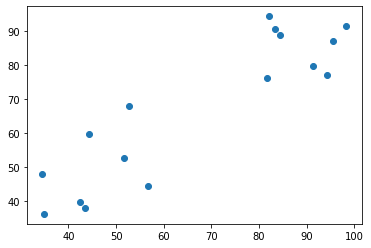

In [70]:
plt.scatter(output,pred)

In [71]:
stats.mstats.normaltest(res)

C:\Users\apraj\AppData\Roaming\Python\Python36\site-packages\scipy\stats\mstats_basic.py:2424: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  np.min(n))


NormaltestResult(statistic=1.8948188642228483, pvalue=0.38774420117001496)

In [72]:
res_sq = res**2
mse = res_sq.mean()

In [73]:
import math
rmse = math.sqrt(mse)

In [74]:
mse

103.20776456249999

In [75]:
rmse

10.159122233859577

Relationship between variables is linear.
Data is hoeskedastic, meaning the variance in the residuals is more or less constant.
REsiduals are independent, meaning the residuals are distributed randomly and not influenced by in previous observation.
Residuals are normally distributed. PDF of the residual values is normally distributed at each X value.

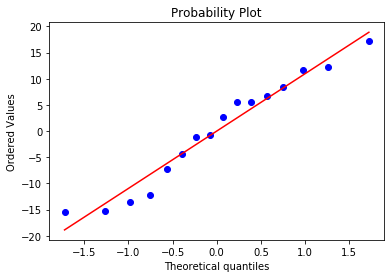

In [76]:
stats.probplot(res,plot=plt)
plt.show()

Residuals Vs Independent variables

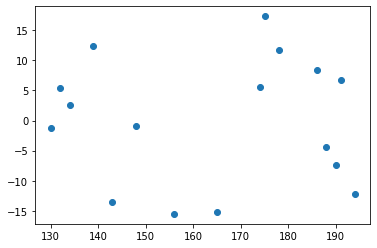

In [77]:
plt.scatter(time,res)
plt.show()

Residual Vs Fitted

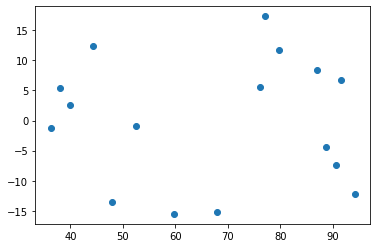

In [78]:
plt.scatter(pred,res)
plt.show()

In [79]:
 data.describe()

,Time,Temperature,Yield
count,16.000000,16.000000,16.000000
mean,163.937500,213.062500,66.981250
std,23.450569,17.650189,23.705336
min,130.000000,176.000000,34.500000
25%,142.000000,203.750000,44.100000
50%,169.500000,214.000000,69.200000
75%,186.500000,226.250000,86.150000
max,194.000000,240.000000,98.300000


TypeError: aggregate() missing 1 required positional argument: 'func'